# Question 6
-----

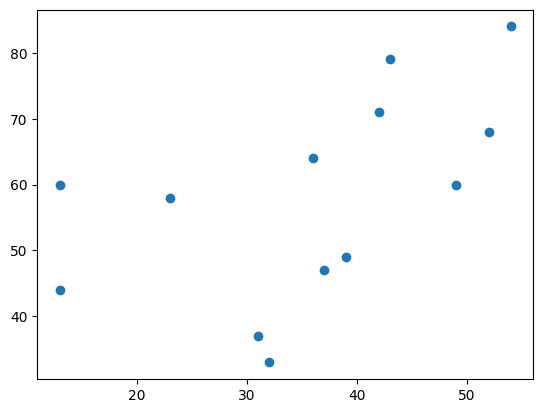

In [1]:
import matplotlib.pyplot as plt

x = [54, 52, 42, 31, 43, 23, 32, 49, 37, 13, 13, 36, 39]
y = [84, 68, 71, 37, 79, 58, 33, 60, 47, 60, 44, 64, 49]

plt.scatter(x, y)
plt.show()

In [2]:
from scipy.stats import pearsonr

pearsons, p_value = pearsonr(x, y)
print(pearsons)

0.5348867186362445


The value indicates that there is no real correlation between the datapoints

d) F, J, and K are outliers

In [3]:
from scipy.stats import spearmanr

x = [54, 52, 42, 31, 43, 32, 49, 37, 36, 39]
y = [84, 68, 71, 37, 79, 33, 60, 47, 64, 49]

rho, p_value = spearmanr(x, y)
print("e) " + str(rho))

e) 0.7939393939393938


In [4]:
from scipy.integrate import quad
import math
import numpy as np
from scipy.special import gamma

class T_dist:
    def __init__(self, nu):
        self.nu = nu
        numerator = gamma((nu + 1) / 2)
        denominator = np.sqrt(np.pi * nu) * gamma(nu / 2)
        self.coefficient = numerator / denominator

    def t_distribution_pdf(self, x):
        return self.coefficient * ((1 + (x**2 / self.nu))**(-(self.nu + 1) / 2))

    def integrate(self, lower_limit, upper_limit):
        result, error = quad(self.t_distribution_pdf, lower_limit, upper_limit)
        
        return result

    def locate(self, area):
        fx = 0
        x = -6
        while fx < area:
            fx = self.integrate(-6, x)
            x = x + 0.00001
            
        return x

$$H_0: p = 0$$

$$H_1: p < 0$$

In [5]:
n = 10
r = rho
nu = n - 2
t = (r * (math.sqrt(nu))) / math.sqrt((1 - (r**2)))
t_dist = T_dist(nu)
prob = t_dist.integrate(-100, t)
print(prob)
if prob < 0.95:
    print("do not reject the null")
else:
    print("reject the null")

0.9969500383430959
reject the null
